In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


c:\Users\eangelec\OneDrive - Intel Corporation\Documents\Projects\mlcourse\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Raw data URL:
URL = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

# Read and create a dataset:
penguins_df = pd.read_csv(URL)

penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Divide the data
target = "species"
features = [col for col in penguins_df if col not in [target]]

X = penguins_df[features].copy()
y = penguins_df[target].copy()

cat_feat = ['island', 'sex'] # Categorical features
num_feat = [col for col in X if col not in cat_feat] # Numerical features

# PCA 2D Graph

In [4]:
# Define the numeric pipeline for PCA:
pca_pipeline_2d = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

pca_2d = pca_pipeline_2d.fit_transform(X[num_feat]) # Get the 2D reduction
pca_2d_df = pd.DataFrame(data=pca_2d, columns=['PC1', 'PC2']) # Create DF for visualization

pca_2d_df[target] = y.reset_index(drop=True)

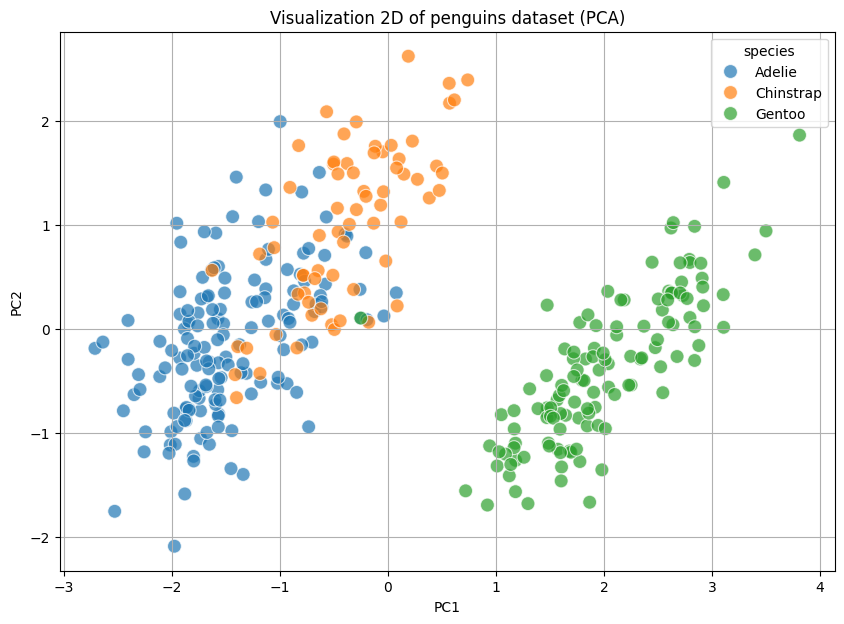

In [5]:
# Create the graph:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue=target,
    data=pca_2d_df,
    s=100,
    alpha=0.7
)
plt.title("Visualization 2D of penguins dataset (PCA)")
plt.grid(True)
plt.show()

# PCA 3D Graph

In [7]:
# Define the numeric pipeline for PCA:
pca_pipeline_3d = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))
])

pca_3d = pca_pipeline_3d.fit_transform(X[num_feat]) # Get the 3D reduction
pca_3d_df = pd.DataFrame(data=pca_3d, columns=['PC1', 'PC2', 'PC3']) # Create DF for visualization

pca_3d_df[target] = y.reset_index(drop=True)

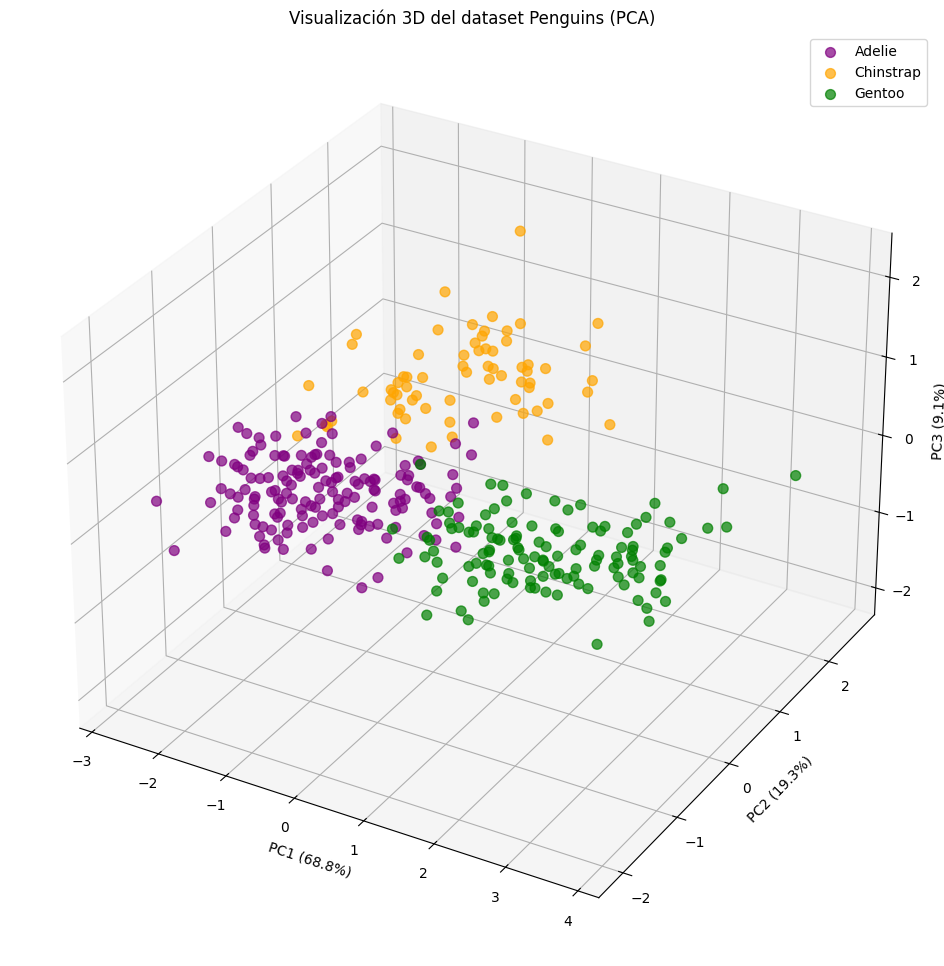

Total variance explained by 3 PCs: 97.29%


In [17]:
# Create the graph:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='3d')

# Get target categories:
target_names = pca_3d_df[target].unique()
colors = ['purple', 'orange', 'green']

for name, color in zip(target_names, colors):
    # Filter the data frame by target_name:
    df_subset = pca_3d_df[pca_3d_df[target] == name]

    # Graph subset points:
    ax.scatter(
        df_subset['PC1'],
        df_subset['PC2'],
        df_subset['PC3'],
        c=color,
        label=name,
        s=50,
        alpha=0.7
    )

# Add variance of every PC:
pca_3d = pca_pipeline_3d.named_steps['pca'] # Obtén el paso 'pca' del pipeline
var_ratios = pca_3d.explained_variance_ratio_

ax.set_title("Visualización 3D del dataset Penguins (PCA)")
ax.set_xlabel(f"PC1 ({var_ratios[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({var_ratios[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({var_ratios[2]*100:.1f}%)")
ax.legend()
plt.show()

print(f"Total variance explained by 3 PCs: {var_ratios.sum()*100:.2f}%")

# t-SNE 2D Graph

In [19]:
# Define the numeric pipeline for TSNE:
tsne_pipeline_2d = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, perplexity=30, random_state=42))
])

tsne_2d = tsne_pipeline_2d.fit_transform(X[num_feat]) # Get the 2D reduction
tsne_2d_df = pd.DataFrame(data=tsne_2d, columns=['Dim 1', 'Dim 2']) # Create DF for visualization

tsne_2d_df[target] = y.reset_index(drop=True)

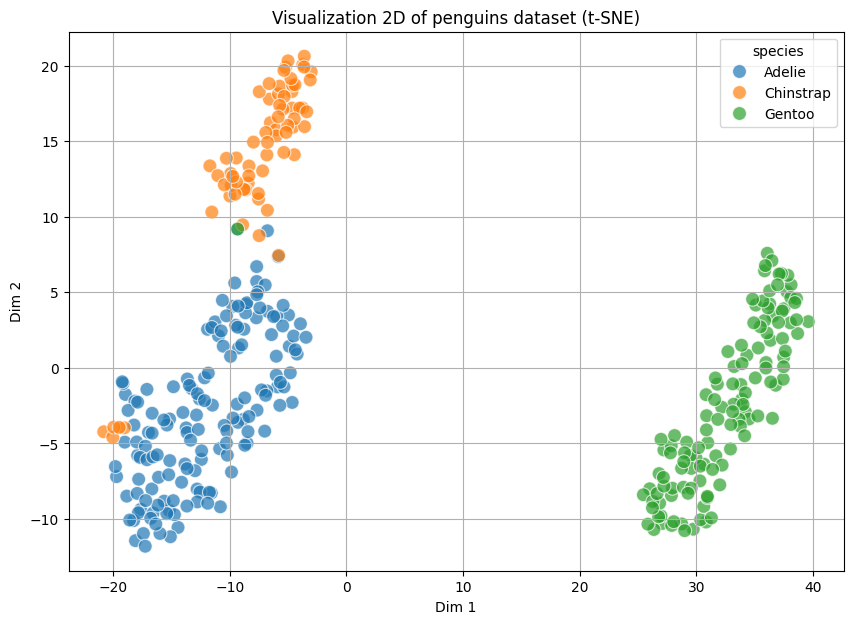

In [20]:
# Create the graph:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="Dim 1",
    y="Dim 2",
    hue=target,
    data=tsne_2d_df,
    s=100,
    alpha=0.7
)
plt.title("Visualization 2D of penguins dataset (t-SNE)")
plt.grid(True)
plt.show()

# t-SNE 3D Graph

In [ ]:
# Define the numeric pipeline for TSNE:
tsne_pipeline_3d = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=3, perplexity=30, random_state=42))
])

tsne_3d = tsne_pipeline_3d.fit_transform(X[num_feat]) # Get the 3D reduction
tsne_3d_df = pd.DataFrame(data=tsne_3d, columns=['Dim 1', 'Dim 2', 'Dim 3']) # Create DF for visualization

tsne_3d_df[target] = y.reset_index(drop=True)

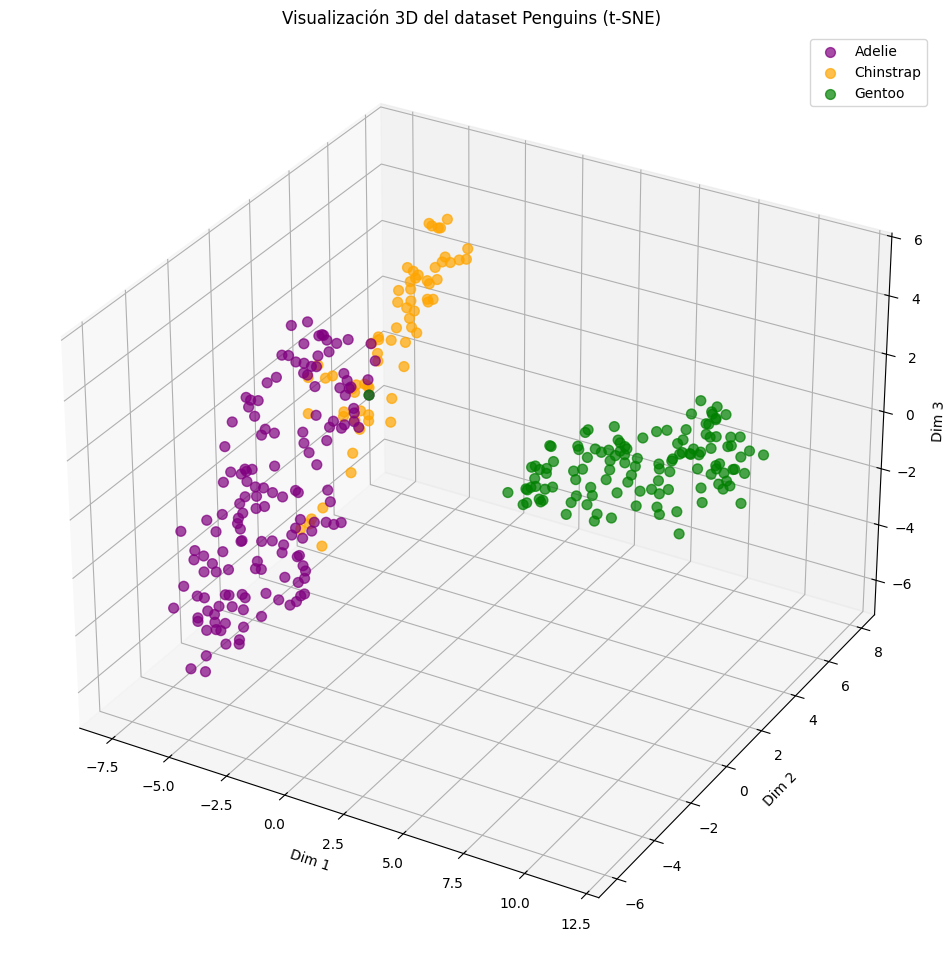

In [22]:
# Create the graph:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='3d')

# Get target categories:
target_names = tsne_3d_df[target].unique()
colors = ['purple', 'orange', 'green']

for name, color in zip(target_names, colors):
    # Filter the data frame by target_name:
    df_subset = tsne_3d_df[tsne_3d_df[target] == name]

    # Graph subset points:
    ax.scatter(
        df_subset['Dim 1'],
        df_subset['Dim 2'],
        df_subset['Dim 3'],
        c=color,
        label=name,
        s=50,
        alpha=0.7
    )

ax.set_title("Visualización 3D del dataset Penguins (t-SNE)")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
ax.legend()
plt.show()


# UMAP 2D Graph

In [26]:
# Define the numeric pipeline for UMAP:
preproc_pipeline_2d = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_preprocessed = preproc_pipeline_2d.fit_transform(X[num_feat]) # Scale and input the data

reducer_umap_2d = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

embed_2d = reducer_umap_2d.fit_transform(X_preprocessed)

umap_2d_df = pd.DataFrame(data=embed_2d, columns=['Dim 1', 'Dim 2'])
umap_2d_df[target] = y.reset_index(drop=True)

c:\Users\eangelec\OneDrive - Intel Corporation\Documents\Projects\mlcourse\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


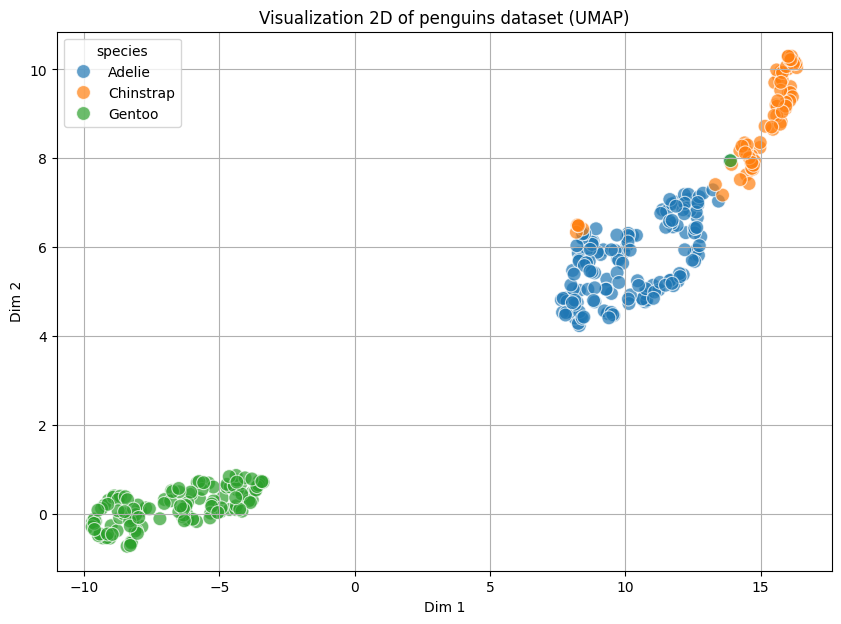

In [27]:
# Create the graph:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="Dim 1",
    y="Dim 2",
    hue=target,
    data=umap_2d_df,
    s=100,
    alpha=0.7
)
plt.title("Visualization 2D of penguins dataset (UMAP)")
plt.grid(True)
plt.show()

# UMAP 3D Graph

In [29]:
# Define the numeric pipeline for UMAP:
preproc_pipeline_3d = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_preprocessed = preproc_pipeline_3d.fit_transform(X[num_feat]) # Scale and input the data

reducer_umap_3d = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

embed_3d = reducer_umap_3d.fit_transform(X_preprocessed)

umap_3d_df = pd.DataFrame(data=embed_3d, columns=['Dim 1', 'Dim 2', 'Dim 3'])
umap_3d_df[target] = y.reset_index(drop=True)

c:\Users\eangelec\OneDrive - Intel Corporation\Documents\Projects\mlcourse\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


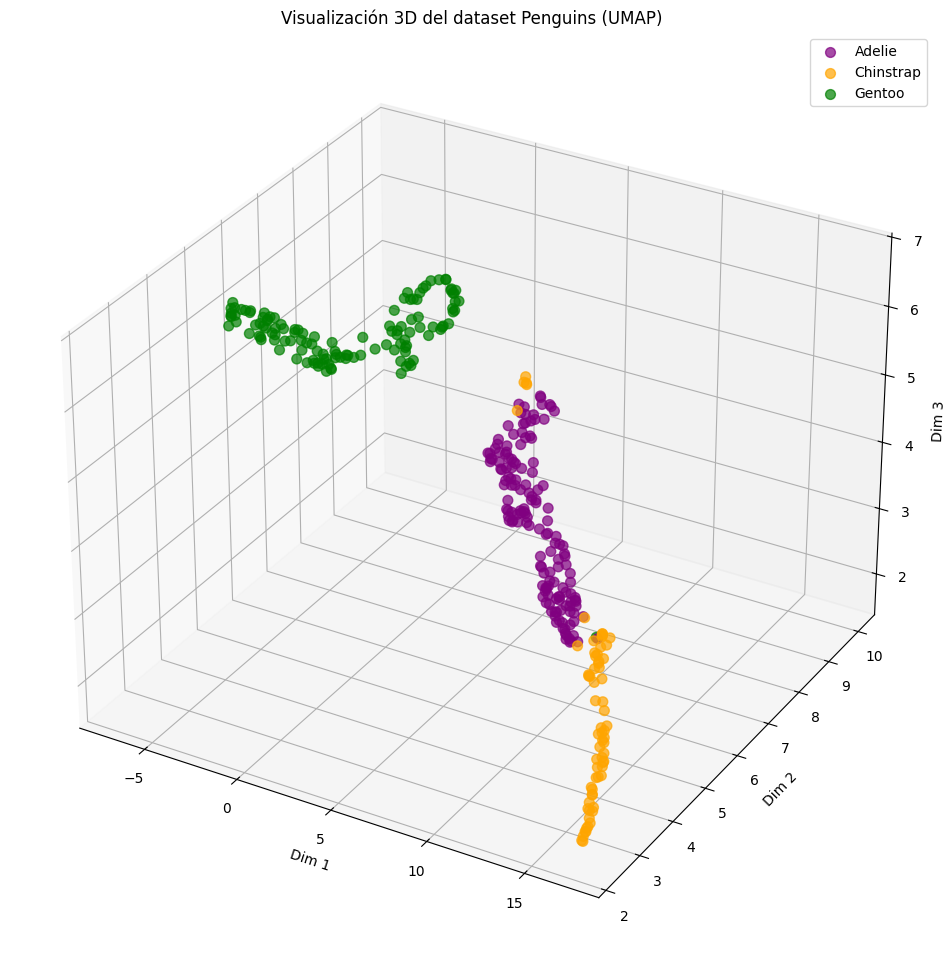

In [30]:
# Create the graph:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection='3d')

# Get target categories:
target_names = umap_3d_df[target].unique()
colors = ['purple', 'orange', 'green']

for name, color in zip(target_names, colors):
    # Filter the data frame by target_name:
    df_subset = umap_3d_df[umap_3d_df[target] == name]

    # Graph subset points:
    ax.scatter(
        df_subset['Dim 1'],
        df_subset['Dim 2'],
        df_subset['Dim 3'],
        c=color,
        label=name,
        s=50,
        alpha=0.7
    )

ax.set_title("Visualización 3D del dataset Penguins (UMAP)")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")
ax.legend()
plt.show()

 # Which one is the best?

The short answer is: **t-SNE and UMAP** will almost always give you the best *visual separation*.

The "why" is the key: they have different objectives.

* **PCA:** Its job is to "squeeze" the data to save the most general information (the **variance**). It's like a map to scale: if your classes (colors) are mixed in reality, PCA will show them to you mixed.

* **t-SNE & UMAP:** Their job is to preserve **local neighbors**. They take the data and "untangle" it 🧶. They actively push different groups (classes) apart to look like separate "islands," sacrificing real global distances just to make the clusters look clear.

**In short:** PCA gives you the *honest* view of the overall structure; t-SNE and UMAP give you the *clearest* view of the clusters.